In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
path = 'C:\\Users\\durrego\\Downloads\\UNAD\\DatosalaU\\'
df = pd.read_csv(path+'TODOCARGA.csv',delimiter='|')
df2 = pd.read_csv(path+'Cod_DANE.csv',delimiter=',')
df3 = pd.read_csv(path+'pesosMaximos.csv',delimiter=';')


C:\Users\durrego\AppData\Local\Temp\ipykernel_5492\1831482254.py:2: DtypeWarning: Columns (1,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'TODOCARGA.csv',delimiter='|')


In [45]:
df.shape

(13413036, 27)

In [46]:
df['VIAJESTOTALES'].sum()

75642468

In [26]:
### Crear las nuevas columnas MES_2 y ANIO
df['MES_2'] = df['MES'].astype(str).str[4:6]
df['ANIO'] = df['MES'].astype(str).str[0:4]

df['ANIO'] = df['ANIO'].astype(int)
df['MES_2'] = df['MES_2'].astype(int)

Se grafica la distribución de los viajes en todo el conjunto de datos

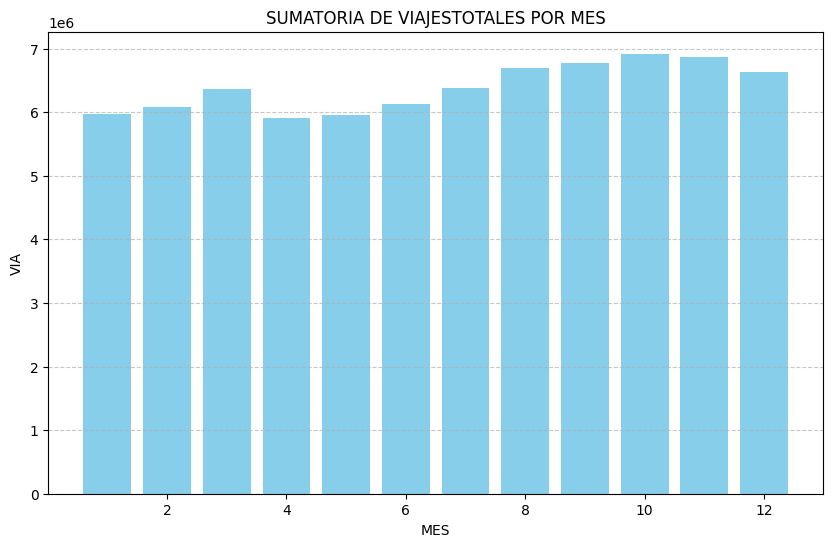

In [27]:
df_grouped = df.groupby('MES_2')['VIAJESTOTALES'].sum().reset_index()

# Graficar MES_2 contra la suma de VIAJESTOTALES
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['MES_2'], df_grouped['VIAJESTOTALES'], color='skyblue')
plt.title('SUMATORIA DE VIAJESTOTALES POR MES')
plt.xlabel('MES')
plt.ylabel('VIA')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

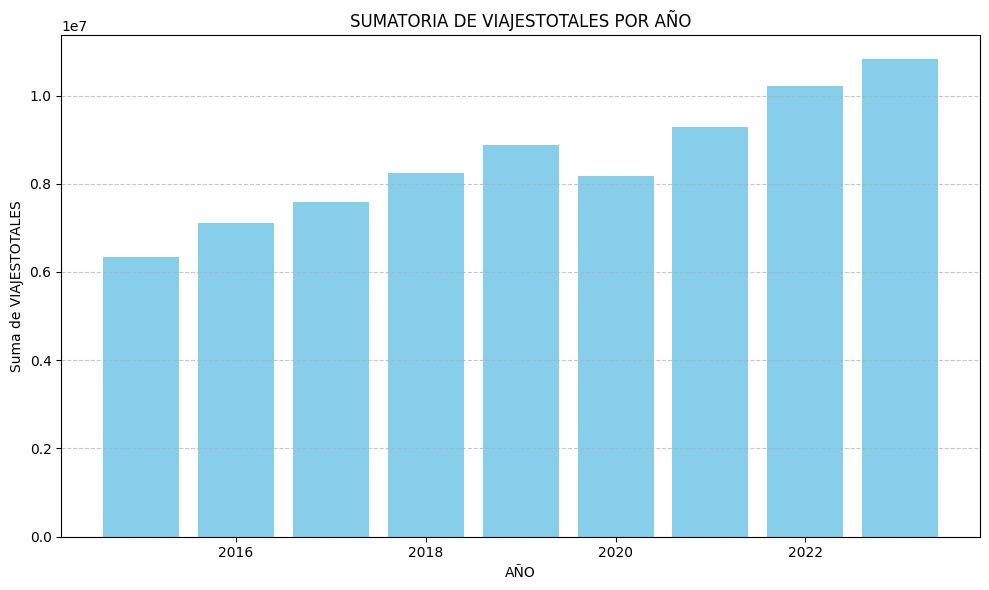

In [28]:
df_grouped = df.groupby('ANIO')['VIAJESTOTALES'].sum().reset_index()

# Graficar MES_2 contra la suma de VIAJESTOTALES
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ANIO'], df_grouped['VIAJESTOTALES'], color='skyblue')
plt.title('SUMATORIA DE VIAJESTOTALES POR AÑO')
plt.xlabel('AÑO')
plt.ylabel('Suma de VIAJESTOTALES')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [30]:
df = df.merge(df2[['Codigo Centro Poblado', 'Nombre Departamento']],
              how='left',
              left_on='CODMUNICIPIOORIGEN',
              right_on='Codigo Centro Poblado')

df.rename(columns={'Nombre Departamento': 'DEP_ORIG'}, inplace=True)
df.drop(columns=['Codigo Centro Poblado'], inplace=True)

df = df.merge(df2[['Codigo Centro Poblado', 'Nombre Departamento']],
              how='left',
              left_on='CODMUNICIPIODESTINO',
              right_on='Codigo Centro Poblado')
df.rename(columns={'Nombre Departamento': 'DEP_DEST'}, inplace=True)
df.drop(columns=['Codigo Centro Poblado'], inplace=True)

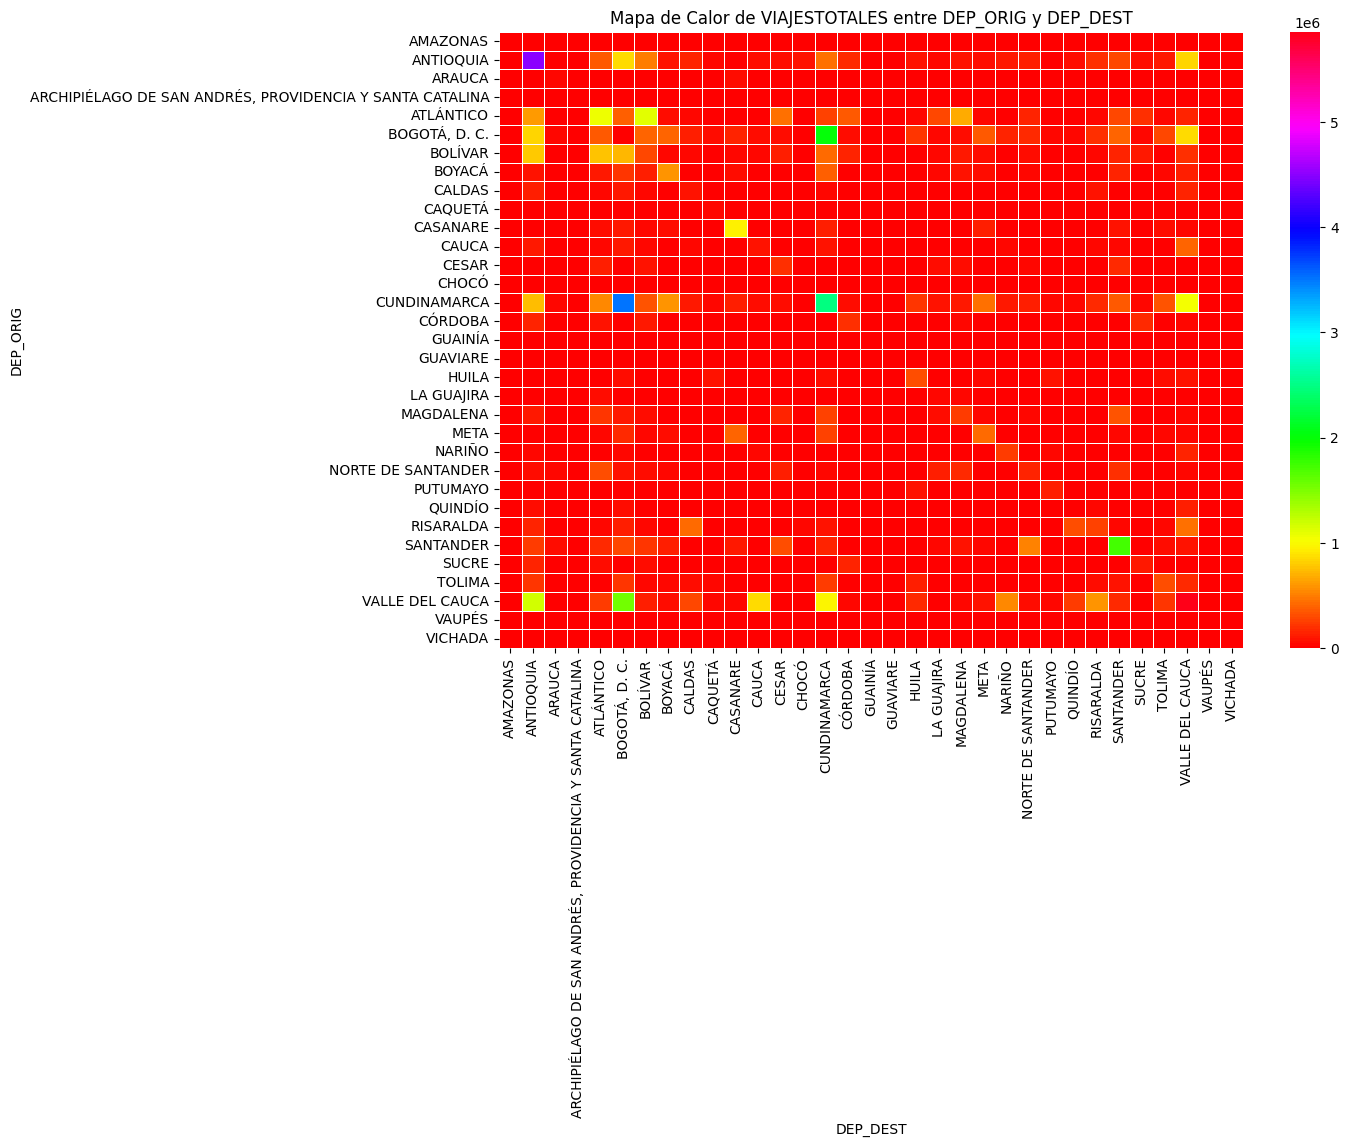

In [39]:
df = df.dropna(subset=['DEP_ORIG'])
df = df.dropna(subset=['DEP_DEST'])
matriz_viajes = df.pivot_table(values='VIAJESTOTALES', index='DEP_ORIG', columns='DEP_DEST', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_viajes, annot=False, fmt=".0f", cmap="hsv", linewidths=0.5)
# Personalizar el gráfico
plt.title("Mapa de Calor de VIAJESTOTALES entre DEP_ORIG y DEP_DEST")
plt.xlabel("DEP_DEST")
plt.ylabel("DEP_ORIG")
plt.show()

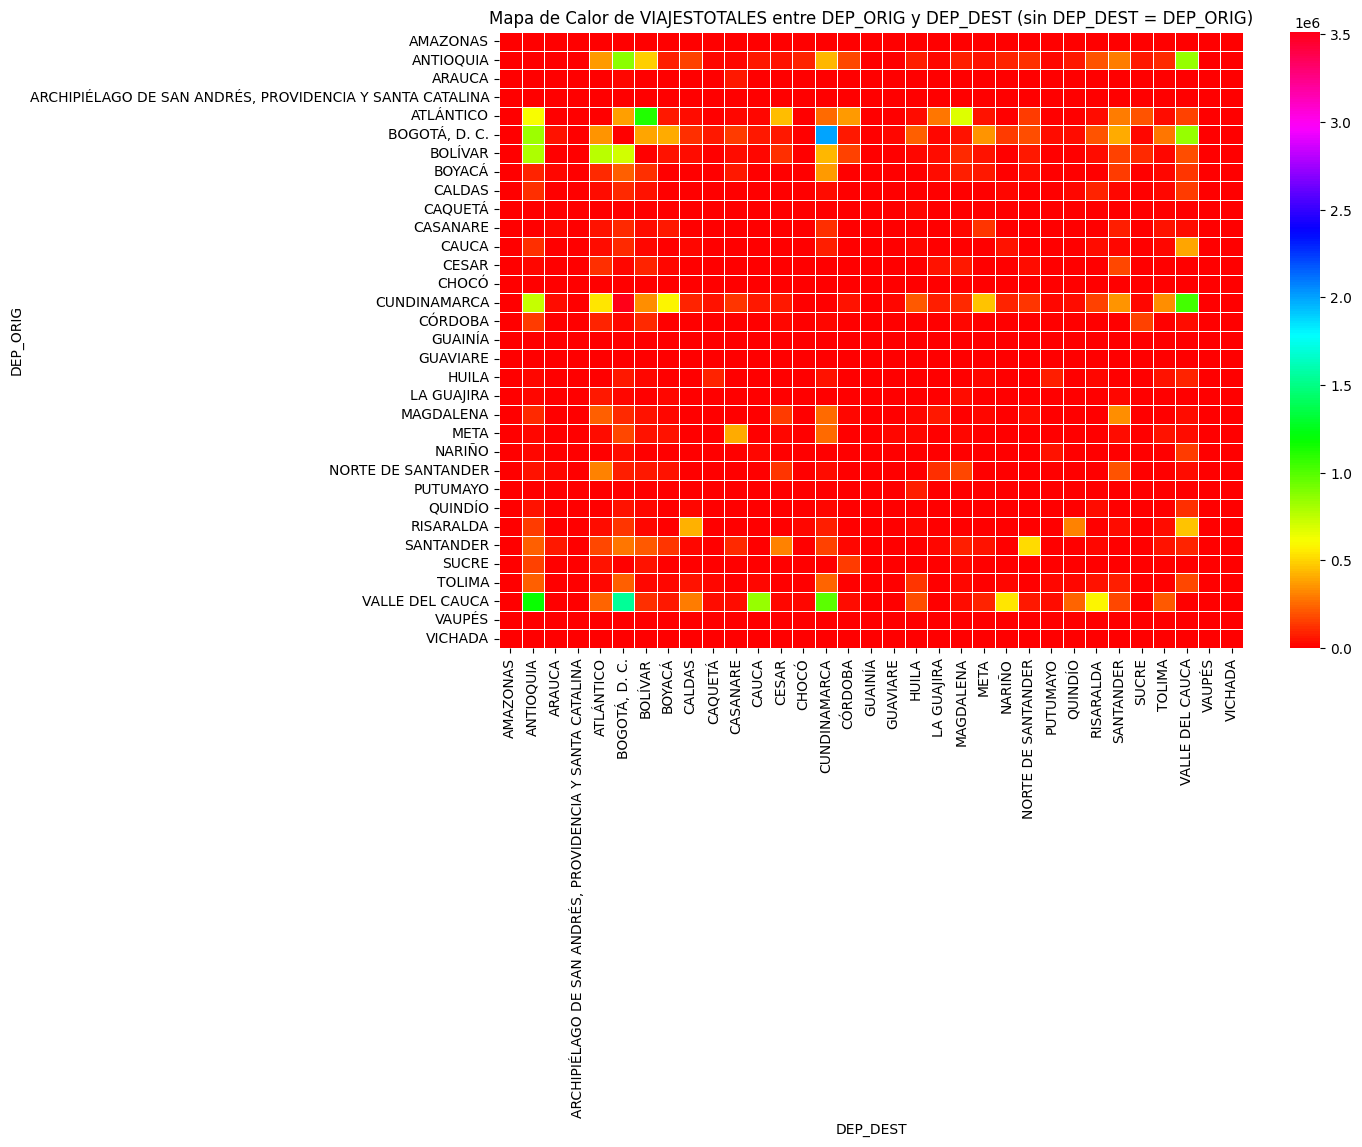

In [38]:
df_filtered = df[df['DEP_ORIG'] != df['DEP_DEST']]
matriz_viajes = df_filtered.pivot_table(values='VIAJESTOTALES', index='DEP_ORIG', columns='DEP_DEST', aggfunc='sum', fill_value=0)

# Configurar la figura y crear el mapa de calor sin números en las casillas
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_viajes, annot=False, cmap="hsv", linewidths=0.5)

# Personalizar el gráfico
plt.title("Mapa de Calor de VIAJESTOTALES entre DEP_ORIG y DEP_DEST (sin DEP_DEST = DEP_ORIG)")
plt.xlabel("DEP_DEST")
plt.ylabel("DEP_ORIG")
plt.show()

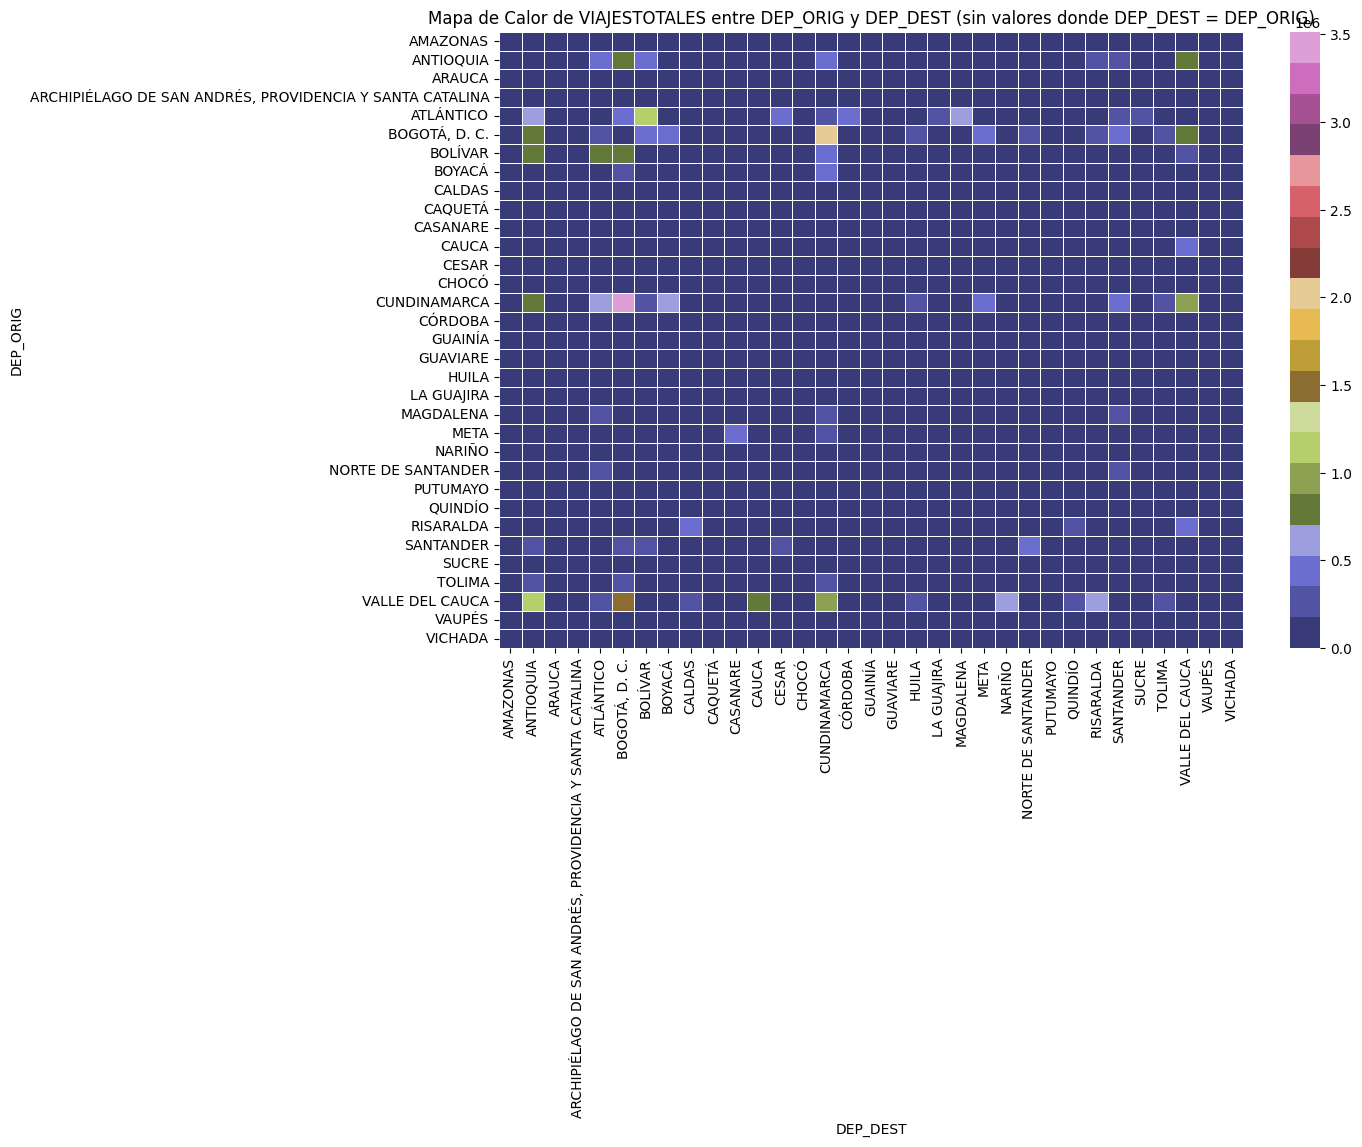

In [ ]:
df_filtered = df[df['DEP_ORIG'] != df['DEP_DEST']]
matriz_viajes = df_filtered.pivot_table(values='VIAJESTOTALES', index='DEP_ORIG', columns='DEP_DEST', aggfunc='sum', fill_value=0)

# Configurar la figura y crear el mapa de calor sin números en las casillas
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_viajes, annot=False, cmap="tab20b", linewidths=0.5)

# Personalizar el gráfico
plt.title("Mapa de Calor de VIAJESTOTALES entre DEP_ORIG y DEP_DEST (DEP_DEST = DEP_ORIG)")
plt.xlabel("DEP_DEST")
plt.ylabel("DEP_ORIG")
plt.show()

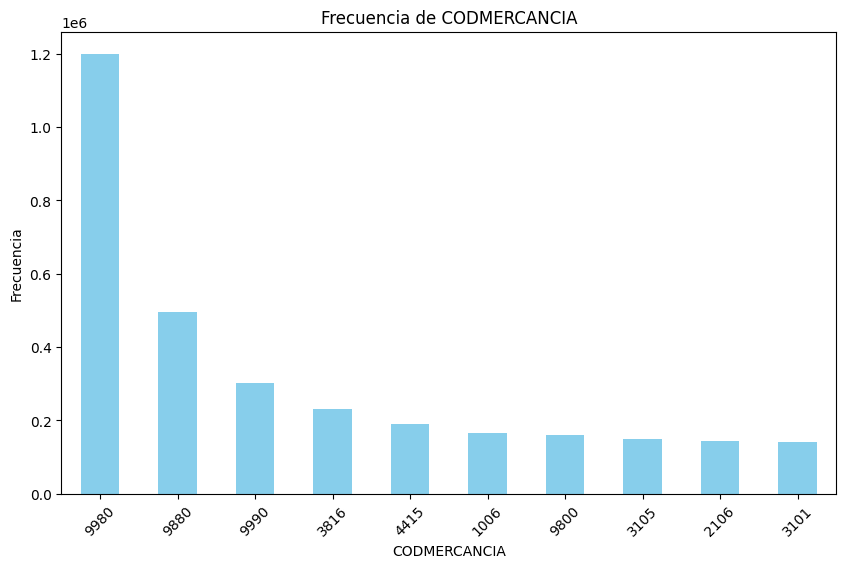

In [44]:
# Contar la frecuencia de cada valor en CODMERCANCIA
frecuencia_codmercancia_top10 = df['CODMERCANCIA'].value_counts().nlargest(10)


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_codmercancia_top10.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de CODMERCANCIA')
plt.xlabel('CODMERCANCIA')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top5_dep_orig_viajes = df.groupby('DEP_ORIG')['VIAJESTOTALES'].sum().nlargest(10)
top5_dep_dest_viajes = df.groupby('DEP_DEST')['VIAJESTOTALES'].sum().nlargest(10)

# Mostrar el resultado
print("Top 10 DEP_ORIG por número de viajes:")
print(top5_dep_orig_viajes)
print("Top 10 DEP_DEST por número de viajes:")
print(top5_dep_dest_viajes)

Top 5 DEP_ORIG por número de viajes:
DEP_ORIG
VALLE DEL CAUCA    13406933
CUNDINAMARCA       11777908
ANTIOQUIA           9330727
BOGOTÁ, D. C.       7360401
ATLÁNTICO           6284093
SANTANDER           4285983
BOLÍVAR             4147649
BOYACÁ              2155075
RISARALDA           2031693
TOLIMA              1719922
Name: VIAJESTOTALES, dtype: int64
Top 5 DEP_DEST por número de viajes:
DEP_DEST
VALLE DEL CAUCA    10845932
ANTIOQUIA          10161808
BOGOTÁ, D. C.       8784968
CUNDINAMARCA        8320896
ATLÁNTICO           4646906
SANTANDER           4554658
BOLÍVAR             3631088
BOYACÁ              2221628
CASANARE            2008264
META                1842502
Name: VIAJESTOTALES, dtype: int64


In [31]:
df.columns


Index(['MES', 'COD_CONFIG_VEHICULO', 'CONFIG_VEHICULO',
       'CODOPERACIONTRANSPORTE', 'OPERACIONTRANSPORTE', 'CODTIPOCONTENEDOR',
       'TIPOCONTENEDOR', 'CODMUNICIPIOORIGEN', 'MUNICIPIOORIGEN',
       'DEPARTAMENTOORIGEN', 'CODMUNICIPIODESTINO', 'MUNICIPIODESTINO',
       'DEPARTAMENTODESTINO', 'CODMERCANCIA', 'MERCANCIA', 'NATURALEZACARGA',
       'VIAJESTOTALES', 'KILOGRAMOS', 'GALONES', 'VIAJESLIQUIDOS',
       'VIAJESVALORCERO', 'KILOMETROS', 'VALORESPAGADOS', 'MES_2', 'ANIO',
       'DEP_ORIG', 'DEP_DEST'],
      dtype='object')